Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Lukas</p>| <p style="text-align: left">Kurz</p> | 12007739 |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2022)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1: Document Classification with word embeddings, CNN, and LSTM</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-framework"><li style="font-size:large;font-weight:bold">Task A: PyTorch Framework for Document Classification (5 points)</li></a>
    <a href="#section-classification-cnn"><li style="font-size:large;font-weight:bold">Task B: Document Classification with CNN (10 points)</li></a>
    <a href="#section-classification-rnn"><li style="font-size:large;font-weight:bold">Task C: Document Classification with LSTM (10 points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div>

### Assignment objective
The aim of this assignment is to implement a document (sentence) classification model with PyTorch, particularly by using Convolutional Neural Networks (CNN) and Long Short-Term Memory (LSTM). The assignment in total has **25 points**.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments. Try to provide the solutions in a clear, and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the author(s) know shall you find any error or unclarity in the assignment.

</div>

<div>

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7) and `PyTorch` (>1.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `transformer`, `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>


<div>

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div>

### Publishing Experiments Results

It is encouraged that you log and store any information about the training and evaluation of the models in an ML dashboard like [`TensorBoard`](https://www.tensorflow.org/tensorboard) or [`wandb`](https://wandb.ai/site). This can contain any important aspect of training such as the changes in the evaluation results on validation, training loss, or learning rate. 

To this end, in the case of `TensorBoard`, after finalizing all experiments and cleaning any unnecessary experiment, publish the log files results through [`TensorBoard.dev`](https://tensorboard.dev). A simple way of doing it is by running the following command in the folder of log files:

`tensorboard dev upload --name my_exp --logdir path/to/output_dir`

`TensorBoard.dev` uploads the necessary files and provides a URL to see the TensorBoard's console. Insert the URL in the cell below.

</div>


**URL :** *EDIT!*

### Setup

Import libraries, download models and set up TensorBoard.

In [1]:
import os
import re

import numpy as np
import pandas as pd
import torch

# for preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import gensim
import gensim.downloader

from sklearn.feature_extraction.text import CountVectorizer

# for data batching
from torch.utils.data import Dataset, DataLoader
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm

# for model
from torch.nn import Embedding, LSTM
from copy import deepcopy

# for evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/home/lukaskurz/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# download the models and data from nltk for preprocessing
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/lukaskurz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lukaskurz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lukaskurz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# downlaod the word2vec model
word2vec = gensim.downloader.load('word2vec-google-news-300')

In [4]:
# set up tensorboard
from torch.utils.tensorboard import SummaryWriter
result_path = './results/'
writer = SummaryWriter(log_dir=os.path.join(result_path, 'tensorboard'))

## Task A: PyTorch Framework for Document Classification (5 points)

<div>

The formulation of this task is identical to the Assignment 3 of UE Natural Language Processing course. In this task, you implement a document classification model, which given a document/sentence, predicts the corresponding class. The PyTorch model in this task should be called **`ClassificationAverageModel`** in your code.

Given a document, first each word is mapped to its corresponding vector. Then, the word vectors are composed to create the embedding of the document using the *element-wise mean* of the word vectors. Formally, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

$$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$$

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document. This document embedding is finally used as features to predict the class (label) of the document. The implementation of the classification model should cover the following points.


    
**Preprocessing, Dictionary, and Word Embedding Lookup (1 point):** Load the train, validation, and test sets. Apply necessary preprocessing steps based on your judgement. Tokenize the preprocessed text. Use the processed tokens of the training set to create a dictionary of vocabularies. Reduce the size of dictionary using a proper method, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs from the texts, or to replace them with a special token like <OOV>. After then, create a lookup for the embeddings of all the words in the dictionary. The lookup is an embedding matrix, which maps the ID of each word to a corresponding vector. Use the pre-trained vectors of a word embedding model (like [`word2vec`](https://code.google.com/archive/p/word2vec/) or [`GloVe`](https://nlp.stanford.edu/projects/glove/)) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. The word embeddings of the classification model are trainable, meaning that the word vectors get updated end-to-end with the other parameters of the model.

**Data Batching and Forward Pass (1 point):** Create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, consisting of the ids of the words in documents. *Batch-size* and *max-document-length* are two hyper-parameters of the model. Next, given a batch, the model fetches the corresponding embeddings, and use them to calculate the document embeddings according to the formulation above. These document embeddings are then exploited to predict the probability distributions of the output classes using a linear projection, followed by a softmax layer.

**Loss Function, Optimization, Early Stopping, and Evaluation (1.5 point):** Loss between the predicted and the actual classes is calculated using Negative Log Likelihood. Feel free to use any optimization mechanism such as Adam. After each epoch, evaluate the model on the *validation set* using the <ins>accuracy metric</ins>. If the evaluation result improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, the training procedure can be terminated. After finishing the training, load the best performing model, and use it to predict the classes of the data points in the test set. To evaluate the models, use the <ins>accuracy metric</ins> throughout the task.

**Overall functionality of the model (1 point)**

**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

</div>

### Preprocessing, Dictionary, and Word Embedding Lookup

#### Read the dataset

We read the train, test and validation splits, along with the labels.
The datasets are returned as pandas Dataframes.

In [5]:
def read_dataset(dataset_base_path = './data/', dataset_size = 'medium'):
    """
    Read the dataset from the given path.
    :param dataset_base_path: the base path of the dataset
    :param dataset_size: the size of the dataset
    """

    training_dataset_path = os.path.join(dataset_base_path, 'thedeep.{}.train.txt'.format(dataset_size))
    validation_dataset_path = os.path.join(dataset_base_path, 'thedeep.{}.validation.txt'.format(dataset_size))
    test_dataset_path = os.path.join(dataset_base_path, 'thedeep.{}.test.txt'.format(dataset_size))
    label_dataset_path = os.path.join(dataset_base_path, 'thedeep.labels.txt'.format(dataset_size))

    training_df = pd.read_csv(training_dataset_path, names=["sentence_id", "text", "label"])
    validation_df = pd.read_csv(validation_dataset_path, names=["sentence_id", "text", "label"])
    test_df = pd.read_csv(test_dataset_path, names=["sentence_id", "text", "label"])
    label_df = pd.read_csv(label_dataset_path, names=["label"])

    return training_df, validation_df, test_df, label_df

In [6]:
training_df, validation_df, test_df, label_df = read_dataset()

training_df.head()

,sentence_id,text,label
0,11609,"• 214,000 students affected as schools close d...",9
1,28291,The primary reported needs for IDPs across the...,4
2,9695,Some 602 000 IDPs are now spread across the co...,3
3,7781,South Sudanese soldiers accused of raping at l...,9
4,31382,"Since the beginning of 2017, 18 882 suspected/...",11


#### Preprocessing and tokenizing

We use the `+foobar+` notation to replace certain words, such as dates and numbers. The `+` sign is compatible with the Lemmatizer from nltk, which is why it was chosen.

In [7]:
def replace_dates(s: str):
    """
    Replace dates with a special token.
    """
    s = re.sub(r'\d{1,2}[\.\,\|\-\_\/\\]\d{1,2}[\.\,\|\-\_\/\\]\d{2,4}', ' +date+ ', s) 
    s = re.sub(r'\d{2,4}[\.\,\|\-\_\/\\]\d{1,2}[\.\,\|\-\_\/\\]\d{1.2}', ' +date+ ', s)
    s = re.sub(r'[1-2]\d{3}', ' +year+ ', s)
    
    return s

def preprocess(s: str):
    """
    Preprocess the given string.
    """
    s = replace_dates(s)
    
    s = re.sub("[+-]?([0-9]*[.,])?[0-9]+", " +num+ ", s)  # escape integers and floats
    s = re.sub('[^a-zA-Z\d\s+]', "", s) # remove non alphanumerics, except for escape char
    s = re.sub('\b[\w]{1}\b', "", s) # remove 1 length words
    s = re.sub('(?<![num|year|date])\+(?!num|year|date\+)', '', s) # match alone standing + signs
    s = s.lower()
    return s

def tokenize(article: str):
    """
    Tokenize the given string.
    """
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in word_tokenize(article) if len(token) > 1 and not token in stop_words]
    
    return tokens

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, article):
        return [self.wnl.lemmatize(t) for t in tokenize(preprocess(article))]

In [8]:
def show_tokenizing_steps(demo_text: str):
    lemma_tokenizer = LemmaTokenizer()

    print('original text: {}\n'.format(demo_text))
    dates_replaces_text = replace_dates(demo_text)
    print('dates replaced: {}\n'.format(dates_replaces_text))
    preprocessed_text = preprocess(demo_text)
    print('preprocessed text: {}\n'.format(preprocessed_text))
    tokenized_text = (' ').join(lemma_tokenizer(preprocessed_text))
    print('tokenized text: {}'.format(tokenized_text))

show_tokenizing_steps(demo_text = training_df.iloc[0]['text'])

original text: • 214,000 students affected as schools close due to insecurity • 65 people killed already in 2018 by improvised explosives• Mass grave uncovered following military violations

dates replaced: • 214,000 students affected as schools close due to insecurity • 65 people killed already in  +year+  by improvised explosives• Mass grave uncovered following military violations

preprocessed text:   +num+  students affected as schools close due to insecurity   +num+  people killed already in  +year+  by improvised explosives mass grave uncovered following military violations

tokenized text: +num+ student affected school close due insecurity +num+ people killed already +year+ improvised explosive mass grave uncovered following military violation


#### Create and reduce dictionary

We create a dictionary from all the feature names in the vectorizer and then use a cut-off threshold to reduce the dictionary size.

In [9]:
def get_dictionary(cut_off_threshold = 0.0001):
    """
    Get the dictionary of the dataset.

    return tuple of (dictionary, reduced_dictionary)
    :param cut_off_threshold: the threshold of the word frequency
    """

    vectorizer = CountVectorizer(preprocessor=preprocess, tokenizer=LemmaTokenizer())
    training_vectorized = vectorizer.fit_transform(training_df['text'])

    word_list = vectorizer.get_feature_names_out()
    count_list = training_vectorized.toarray().sum(axis=0)
    token_dictionary = dict(zip(word_list,count_list))

    word_amount = sum(token_dictionary.values())
    reduced_token_dictionary = {}
    for word in token_dictionary:
        if token_dictionary[word] > word_amount*cut_off_threshold:
            reduced_token_dictionary[word] = token_dictionary[word]
    
    return token_dictionary, reduced_token_dictionary

In [10]:
def show_dictionaries():
    """
    Show the length of the dictionaries, before and after cutoff.
    Might take some seconds to compute.
    """
    full_token_dictionary, reduced_token_dictionary = get_dictionary()
    print('The length of the dictionary is {}'.format(len(full_token_dictionary)))
    print(' '.join(list(full_token_dictionary.keys())[:7]) + ' ...' + ' '.join(list(full_token_dictionary.keys())[-7:]))
    print('The length of the reduced dictionary is {}'.format(len(reduced_token_dictionary)))
    print(' '.join(list(reduced_token_dictionary.keys())[:7]) + ' ...' + ' '.join(list(reduced_token_dictionary.keys())[-7:]))

    return full_token_dictionary, reduced_token_dictionary

_, token_dictionary = show_dictionaries()

The length of the dictionary is 36216
+date+ +num+ +year+ aa aaf aah aal ...zuwara zuwarah zuwaras zuwayed zvulun zwak zwara
The length of the reduced dictionary is 1530
+date+ +num+ +year+ ability able aboveaverage absence ...yet yield yobe young youth zambia zone


#### Map word embeddings to dictionary words

We map the words of the dictionary to their respective word embeddings from `word2vec`.

Out-of-vocabulary tokens are replaced with a random vector

In [66]:
def get_embedding(dictionary: dict):
    """
    Convert the word embedding dict to a matrix and return a torch.Embedding
    :param dictionary: the embedding dictionary
    """
    mean = np.mean(word2vec.vectors)
    std = np.std(word2vec.vectors)
    dictionary_keys = list(dictionary.keys())
    dictionary_keys.insert(0, '+pad+')
    dictionary_keys.insert(1, '+oov+')
    np.random.seed(42069)
    word_lookup = np.zeros(shape=(len(dictionary_keys), word2vec.vector_size))
    for idx, word in enumerate(dictionary_keys):
        if word in word2vec:
            word_lookup[idx] = word2vec[word]
        else:
            word_lookup[idx] = np.random.normal(loc=mean, scale=std, size=word2vec.vector_size)

    return Embedding.from_pretrained(torch.tensor(word_lookup, dtype=torch.float32), freeze=False, padding_idx=0), dictionary_keys

In [67]:
embedding_matrix, dictionary_keys = get_embedding(token_dictionary)
print('dictionary_keys: {}...'.format(', '.join(dictionary_keys[0:10])))
print('embedding_matrix shape: {}'.format(embedding_matrix.weight.shape))

dictionary_keys: +pad+, +oov+, +date+, +num+, +year+, aa, aba, ababa, abandon, abandoned...
embedding_matrix shape: torch.Size([6373, 300])


### Data Batching and Forward Pass

#### Create datasets

In [13]:
def map_dict_ids(words: list, dictionary_keys: list):
    """
    Maps a list of words to their respective indexes/ids in the dictionary.
    Out of vocabulary words are skipped/ignored.
    
    :param words: list of strings
    :param dictionary: dictionary of keys
    """
    results = []
    # using a try-catch to account for words not in dictionary is much faster than checking each word with an if
    # since most of the words are found and only a small percentage throws an exception, that needs to be caught
    for word in words:
        try:
            results.append(dictionary_keys.index(word))
        except:
            results.append(dictionary_keys.index('+oov+'))
    
    return results

def transform_document(document: str, dictionary_keys: list, tokenizer: LemmaTokenizer, max_length: int):
    """
    Transform the document to a list of indexes.
    Document is preprocessed and tokenized.
    Then it is either cut or padded to max_length.
    Padding is done with the -1 value, since that matches no token id.
    :param document: the document to be transformed
    :param dictionary_keys: the dictionary keys
    :param tokenizer: the tokenizer
    :param max_length: the max length of the document
    """
    words = tokenizer(document)
    ids = map_dict_ids(words, dictionary_keys)
    cutoff_ids = ids[0:max_length]
    padded_ids = np.pad(cutoff_ids, (0,max_length-len(cutoff_ids)), mode='constant', constant_values=0) # is pad index
    
    return padded_ids

To speed up the creation of the documents, we utilize multi threading. With small dictionary, this is not really relevant, but processing time increased when a bigger dictionary ~ smaller cut-off is chosen.

In [14]:
def transform_document_mp(args):
    """
    Wrapper for transform_document, that accepts the args as a tuple.
    """
    return [transform_document(d, args[2], args[3], args[4]) for d in args[0]], args[1]

def create_arguments(documents: list, labels: list, batch_size: int, dictionary_keys: list, tokenizer: LemmaTokenizer, max_length: int):
    """
    Create the arguments list for the multiprocessing.
    :param documents: the documents to be transformed
    :param labels: the labels of the documents
    :param batch_size: the batch size used for the multiprocessing jobs.
    :param dictionary_keys: the dictionary keys
    :param tokenizer: the tokenizer
    :param max_length: the max length of the output document
    """
    arguments = []
    n = len(documents)
    start = 0
    for end in range(batch_size, n, batch_size):
        arguments_batch = (documents[start:end],labels[start:end], dictionary_keys, tokenizer, max_length)
        arguments.append(arguments_batch)
        start = end
    # if n % batch_size != 0:
    arguments.append((documents[start:],labels[start:], dictionary_keys, tokenizer, max_length))

    return arguments

We wrap all of the above code into a pytorch dataset.

In [15]:
class DocumentsDataset(Dataset):
    def __init__(self, df: pd.DataFrame, max_document_length: int, tokenizer: LemmaTokenizer, dictionary_keys: list, n_jobs = 10, loading_label = 'Transforming Documents'):
        """
        Create a dataset from a pandas dataframe.

        Throws error if n_jobs is bigger than available cpu core count
        :param df: the pandas dataframe
        :param max_document_length: the max length of the documents
        :param tokenizer: the tokenizer
        :param dictionary_keys: the dictionary keys
        :param n_jobs: the number of jobs for the multiprocessing
        """
        if n_jobs > cpu_count():
            raise ValueError('n_jobs must be less than or equal to the number of available CPU cores')        

        transformed_documents = []
        transformed_labels = []
        with tqdm(total=len(df), desc=loading_label) as pbar:
            pool = Pool(processes=n_jobs) 
            documents = df['text'].values
            labels = df['label'].values
            arguments = create_arguments(documents, labels, 300, dictionary_keys, tokenizer, max_document_length)
            for result in pool.imap_unordered(transform_document_mp, arguments):
                pbar.update(len(result[0]))
                transformed_documents.extend(result[0])
                transformed_labels.extend(result[1])
        
        self.documents = torch.tensor(transformed_documents).type(torch.int32)
        self.labels = torch.tensor(transformed_labels).type(torch.int32)
                                   
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self,idx):
        document = self.documents[idx]
        label = self.labels[idx]
        return document, label

In [16]:
def get_datasets(max_document_length: int, tokenizer: LemmaTokenizer, dictionary_keys: list, n_jobs = 10):
    """
    Get the datasets for training, validation and test.
    :param max_document_length: the max length of the documents
    """

    # Define Datasets and create Dataloader
    train_dataset = DocumentsDataset(training_df, max_document_length, tokenizer, dictionary_keys, n_jobs, 'Loading Training Dataset')
    val_dataset = DocumentsDataset(validation_df, max_document_length, tokenizer, dictionary_keys, n_jobs, 'Loading Validation Dataset')
    test_dataset = DocumentsDataset(test_df, max_document_length, tokenizer, dictionary_keys, n_jobs, 'Loading Test Dataset')

    return (train_dataset, val_dataset, test_dataset)

In [17]:
def show_dataset_loading():
    train, val, test = get_datasets(max_document_length = 100, tokenizer = LemmaTokenizer(), dictionary_keys = dictionary_keys, n_jobs = 10)
    print('Training dataset size: {}'.format(len(train)))
    print('Validation dataset size: {}'.format(len(val)))
    print('Test dataset size: {}'.format(len(test)))

show_dataset_loading()

Loading Training Dataset:   0%|          | 0/26600 [00:00<?, ?it/s]

Loading Validation Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

Loading Test Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

Training dataset size: 26600
Validation dataset size: 5700
Test dataset size: 5700


#### Create Dataloader

We implement batching using pytorch's dataloaders

In [18]:
def collate_fn(batch):
    """
    Collate function for the dataloader.
    :param batch: the batch
    """
    documents_stacked = torch.zeros(len(batch), len(batch[0][0]), dtype=torch.long)
    labels_stacked = torch.zeros(len(batch), dtype=torch.long)
    for idx, elem in enumerate(batch):
        documents_stacked[idx] = batch[idx][0]
        labels_stacked[idx] = batch[idx][1]
    return documents_stacked, labels_stacked

In [19]:
def get_dataloaders(batch_size: int, max_document_length: int, tokenizer: LemmaTokenizer, dictionary_keys: list, n_jobs = 10):
    """
    Get the dataloaders for training, validation and test.
    :param batch_size: the batch size
    :param max_document_length: the max length of the documents
    :param tokenizer: the tokenizer
    :param dictionary_keys: the dictionary keys
    :param n_jobs: the number of jobs for the multiprocessing of the datasets
    """
    
    train_dataset, test_dataset, val_dataset = get_datasets(max_document_length, tokenizer, dictionary_keys, n_jobs)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 2, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers = 2, collate_fn=collate_fn)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = 2, collate_fn=collate_fn)

    return (train_dataloader, test_dataloader, val_dataloader)

#### Model definition

In [62]:
class ClassificationAverageModel(torch.nn.Module):
        def __init__(self, embedding: torch.nn.Embedding, n_labels: list):
            super(ClassificationAverageModel, self).__init__()
            self.embedding = embedding
            self.linear = torch.nn.Linear(word2vec.vector_size,n_labels)
            self.softmax = torch.nn.Softmax(dim = 1)

        def _document_embedding_from_batch(self, x, device):
            """
            Converts a batch of word indexes to the respective document embedding
            """

            documents = x
            mask = documents == 0 # mask to remember padding

            embeddings = self.embedding(documents)
            # embeddings[mask] = torch.zeros(word2vec.vector_size, device=device) # zero out the embeddings were padding was used
            n = documents.shape[1] - mask.sum(axis=1) # get length of the individual documents

            # Sum the embeddings and divide them by their lengths to calculate the means.
            # Transpose to get right shape for division along the correct axis
            document_embedding = (embeddings.sum(axis=1).T / n).T 
            return document_embedding
        
        def forward(self, x, device):
            document_embedding = self._document_embedding_from_batch(x, device)
            d = self.linear(document_embedding)
            d = self.softmax(d)
            return d

### Loss Function, Optimization, Early Stopping, and Evaluation

#### Hyper Params

We create a class to contain all the hyperparams.

Since all the code in the previous steps is wrapped in functions and parameterized, it allows us to easily tune parameters in these steps, without having to re-run the whole notebook.

In [55]:
class Params():
    
    def __init__(self, 
        optimizer: torch.optim.Optimizer,
        device: torch.device, 
        loss_function, 
        num_epochs: int,
        early_stopping_patience: int, 
        batch_size: int,
        max_document_length: int,
        cut_off_threshold: float,
        tokenizer: LemmaTokenizer,
        learning_rate: float,
        weight_decay: float = 1e-6,
        hidden_dim: int = 128,
        num_layers: int = 2,
        dropout: float = 0.2,
        ):

        self.optimizer = optimizer
        self.device = device
        self.loss_function = loss_function
        self.num_epochs = num_epochs
        self.early_stopping_patience = early_stopping_patience
        self.batch_size = batch_size
        self.max_document_length = max_document_length
        self.cut_off_threshold = cut_off_threshold
        self.tokenizer = tokenizer
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout

#### Train and test loop

In [56]:
def train_model(model:torch.nn.Module, dataloader: DataLoader, params: Params):
    model.train()
    train_losses = []
    train_accuracies = []
    for x, y in dataloader:
        params.optimizer.zero_grad()

        x = x.to(params.device)
        y = y.to(params.device)
        
        y_hat = model.forward(x, params.device)
        y_hat_idx = torch.argmax(y_hat, axis=1)
        accuracy = (torch.sum(y_hat_idx == y)/len(y))

        # calculate loss 
        loss = params.loss_function(y_hat, y)
        loss.backward()
        params.optimizer.step()

        train_losses.append(loss.item())
        train_accuracies.append(accuracy.item())
    
    return train_losses, train_accuracies

def eval_model(model:torch.nn.Module, dataloader: DataLoader, params: Params):
    model.eval()
    eval_losses = []
    eval_accuracies = []

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(params.device)
            y = y.to(params.device)
            
            y_hat = model.forward(x, params.device)
            y_hat_idx = torch.argmax(y_hat, axis=1)
            accuracy = (torch.sum(y_hat_idx == y)/len(y))

            # calculate loss 
            loss = params.loss_function(y_hat, y)
            eval_losses.append(loss.item())
            eval_accuracies.append(accuracy.item())    
    
    
    return eval_losses, eval_accuracies

In [57]:
def train_and_eval(model: torch.nn.Module, train_dataloader:DataLoader, validation_dataloader: DataLoader, params: Params):
    torch.manual_seed(42069)
    # used for early stopping
    best_accuracy = 0
    best_model = None
    patience = params.early_stopping_patience

    pbar = tqdm(range(params.num_epochs))
    for epoch in pbar:
        ### train ###
        train_losses, train_accuracies = train_model(model, train_dataloader, params)
        
        # tensorboard reporting
        train_loss = np.mean(train_losses)
        writer.add_scalar(tag="training/loss", scalar_value=train_loss, global_step=epoch)
        train_accuracy = np.mean(train_accuracies)
        writer.add_scalar(tag="training/acc", scalar_value=train_accuracy, global_step=epoch)

        ### eval ###
        val_losses, val_accuracies = eval_model(model, validation_dataloader, params)

        # tensorboard reporting
        val_loss = np.mean(val_losses)
        writer.add_scalar(tag="validation/loss", scalar_value=val_loss, global_step=epoch)
        val_accuracy = np.mean(val_accuracies)
        writer.add_scalar(tag="validation/acc", scalar_value=val_accuracy, global_step=epoch)
        
        # early stopping
        if val_accuracy > best_accuracy:
            patience = params.early_stopping_patience
            best_accuracy = val_accuracy
            best_model = deepcopy(model.state_dict())
        else:
            patience -= 1
        
        if patience == 0:
            print("Early stopping")
            model.load_state_dict(best_model)
            break

        # progress bar indication
        pbar.set_description(f'Epoch {epoch+1}/{params.num_epochs}')
        pbar.set_postfix(train_loss=train_loss, train_accuracy=train_accuracy, val_loss=val_loss, val_accuracy=val_accuracy)
    
    return best_accuracy

#### Execution & Hyper-parameter Tuning

In [69]:
params = Params(
        tokenizer=LemmaTokenizer(),
        cut_off_threshold = 0.00001,
        max_document_length=150,
        batch_size=32,
        num_epochs=30, 
        early_stopping_patience=5, 
        learning_rate=1e-4,
        optimizer=torch.optim.Adam, 
        device=torch.device("cuda" if torch.cuda.is_available() else "cpu"), 
        loss_function=torch.nn.CrossEntropyLoss()
    )

In [70]:
# get the dictionary
_, token_dictionary  = get_dictionary(params.cut_off_threshold)
print(f"Number of tokens, with cut-off {params.cut_off_threshold}: {len(token_dictionary)}")

# get the embedding
word_embedding, dictionary_keys = get_embedding(token_dictionary)
print('word_embedding shape: {}'.format(word_embedding.weight.shape))

# get the data
train_dataloader, validation_dataloader, test_dataloader = get_dataloaders(params.batch_size, params.max_document_length, params.tokenizer, dictionary_keys)

Number of tokens, with cut-off 1e-05: 6371
word_embedding shape: torch.Size([6373, 300])


Loading Training Dataset:   0%|          | 0/26600 [00:00<?, ?it/s]

Loading Validation Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

Loading Test Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

In [71]:
# get the model
model = ClassificationAverageModel(word_embedding.to(params.device), len(label_df)).to(params.device)

# set optimizer
params.optimizer = params.optimizer(model.parameters(), lr=params.learning_rate)

In [72]:
best_accuracy = train_and_eval(model, train_dataloader, validation_dataloader, params)
print(f"Best validation accuracy: {best_accuracy}")

_,test_accuracies = eval_model(model, test_dataloader, params)
print('Test set accuracy:',np.mean(test_accuracies))

  0%|          | 0/30 [00:00<?, ?it/s]

Best validation accuracy: 0.5707053072625698
Test set accuracy: 0.5682611731843575


#### Evaluation

/tmp/ipykernel_57788/1453517150.py:20: RuntimeWarning: invalid value encountered in true_divide
  df_cm = pd.DataFrame(np.nan_to_num(cf_matrix/np.sum(cf_matrix, axis=0),0), index = [i for i in classes],


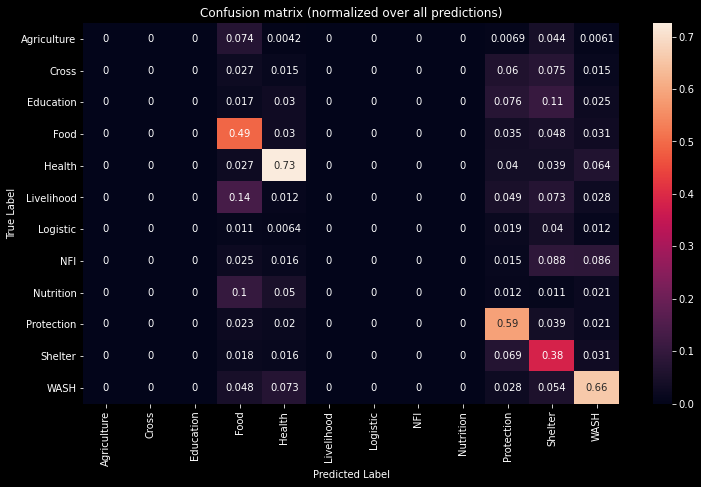

In [73]:
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
        for x, y in test_dataloader:
            x = x.to(params.device)
            y = y.to(params.device)
            
            y_hat = model.forward(x, params.device)
            y_hat_idx = torch.argmax(y_hat, axis=1)
            y_pred.extend(y_hat_idx.cpu().numpy())
            y_true.extend(y.cpu().numpy())

# constant for classes
classes = label_df['label'].values

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(np.nan_to_num(cf_matrix/np.sum(cf_matrix, axis=0),0), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion matrix (normalized over all predictions)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

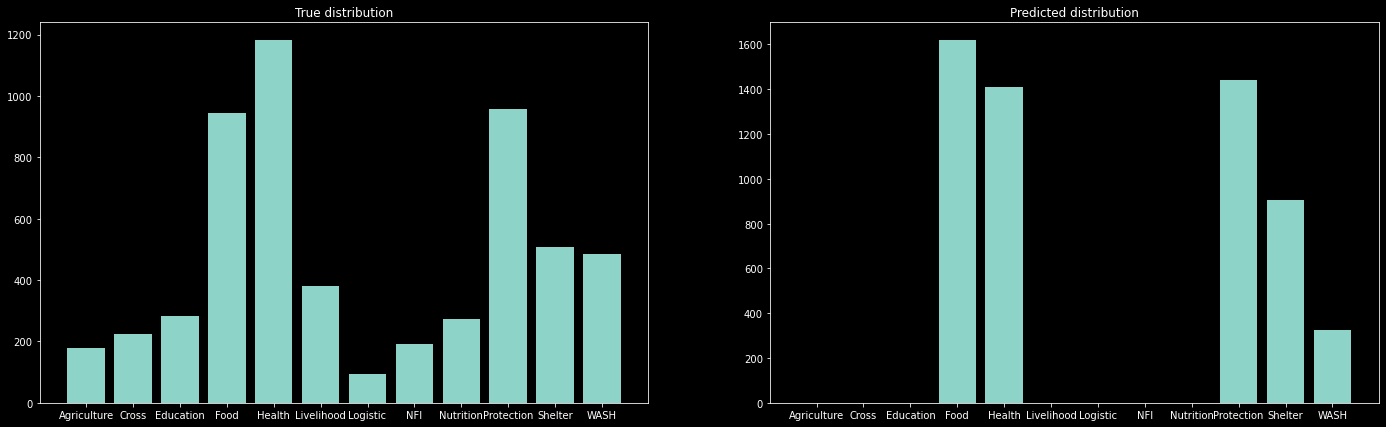

In [74]:
def get_distribution(array: list, classes: list):
    distribution = {}
    for i in range(len(classes)):
        distribution[classes[i]] = array.count(i)
    return distribution


plt.figure(figsize = (24,7))
plt.subplot(1,2,1)
dist_1 = get_distribution(y_true, classes)
plt.bar(dist_1.keys(), dist_1.values())
plt.title('True distribution')
plt.subplot(1,2,2)
dist_2 = get_distribution(y_pred, classes)
plt.bar(dist_2.keys(), dist_2.values())
plt.title('Predicted distribution')
plt.show()

## Task B: Classification with CNN (10 points)

<div>

In this task, we implement a document classification model using Convolutional Neural Networks (CNN). This model should be called **`ClassificationCNNModel`** and contains all various variations as described later on. The schematic architecture of `ClassificationCNNModel` is shown in the figure. `ClassificationCNNModel` extends `ClassificationAverageModel` by CNN layers, and is in principle built on top `ClassificationAverageModel`.

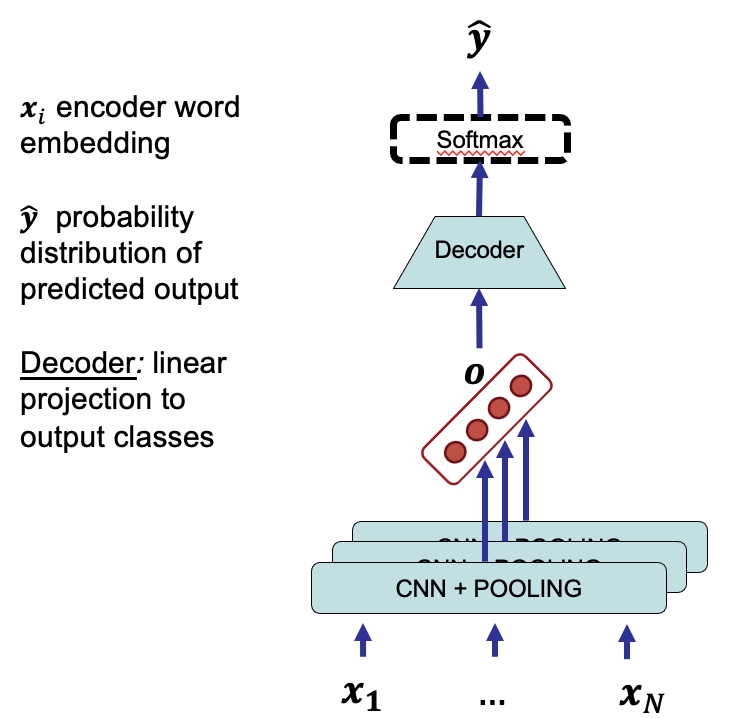

The implementation of `ClassificationCNNModel` covers the following points:

**Baseline model (5 points):** The baseline CNN model first fetches the corresponding embeddings of the word IDs of a given batch. The resulting word embeddings are then passed to three separate CNNs, each followed by a pooling mechanism. The CNNs capture unigram, bigram, and trigram patterns, and have $n_{uni}$, $n_{bi}$, and $n_{tri}$ filters (kernels), respectively. This results in three feature vectors with $n_{uni}$, $n_{bi}$, and $n_{tri}$ dimensions, which are then concatenated to form the document embedding. Finally, the document embedding is used to predict the probability distribution of the output classes by being passed to the decoder (a linear projection) and a softmax layer.

**Model variations (3 points):** Implement the **three variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationCNNModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Variation 1 - Input Embeddings**. Select (at least) one of these proposed cases:
  - Freeze the weights of the encoder word embeddings (no updates)
  - Initialize the encoder word embeddings randomly instead of using pretrained embeddings. 

- **Variation 2 - Regularization & Optimization**. Select (at least) one of these proposed cases:
  - Apply dropout to the final feature vector and tune the dropout rate.
  - Add L2 weight regularization to the loss function and tune its coefficient.
  - Use SGD instead of Adam.

- **Variation 3 - CNNs**. Select (at least) one of these proposed cases:
  - Increase/decrease the size of the output channel of the CNNs.
  - Experiment with various paddings and/or strides.
  - Add CNNs that capture larger n-grams (>3) and/or remove some of the current CNNs.


**Reporting and discussion (2 points)** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

## Task C: Classification with LSTM (10 points)

<div>

This task implements a document classification model with PyTorch using Long Short-Term Memory (LSTM). This model should be called **`ClassificationRNNModel`** in your code, which contains all various variants as explained later. The schematic architecture of `ClassificationRNNModel` is shown in the figure below. `ClassificationRNNModel` extends `ClassificationAverageModel` by an LSTM layer. 

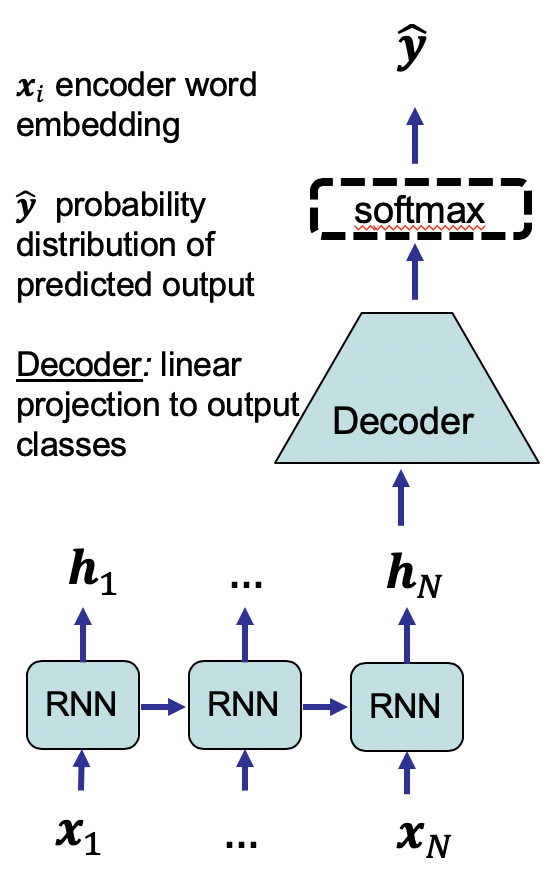

The implementation of `ClassificationRNNModel` covers the following points:

**Baseline model (5 points):** The baseline LSTM model first fetches the corresponding embeddings of the word IDs of a given batch. It then calculates hidden states of the given sequences (documents) with the LSTM model. Finally, the **last hidden state** of LSTM is used as document embedding to predict the probability distribution of the output classes by the decoder (a linear projection) and a softmax layer. A dropout layer is applied to the output of the LSTM.

**Model variations (3 points):** Implement the **three variations** of the baseline LSTM model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationRNNModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Variation 1 - Word Embeddings & RNN (1 point).** Select (at least) one of these proposed cases:
  - Freeze the weights of encoder word embeddings (no updates)
  - Initialize the encoder word embeddings randomly instead of using pretrained embeddings. 
  - Increase/decrease the dimension of the hidden state of the RNN.
  - Use GRU instead of LSTM.

- **Variation 2 - Regularization & Optimization (1 point).** Select (at least) one of these proposed cases:
  - Increase/decrease drop out rates and tune the model accordingly.
  - Add L2 weight regularization to the loss function.
  - Use SGD instead of Adam.

- **Variation 3 - Document Embedding (1 point).** Select (at least) one of these proposed cases:
  - Use a Bidirectional LSTM, and set the document embedding as the concatenation of the last state of forward LSTM with the last state of backward LSTM.
  - Calculate the mean of all the intermediary hidden states as the final document embedding.

**Reporting and discussion (2 points)** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

</div>

### Baseline model

#### Definition

In [75]:
class ClassificationRNNModel(torch.nn.Module):
        def __init__(self, embedding: torch.nn.Embedding, hidden_dim: int, n_labels: list, drop_out = 0.0, num_layers: int = 1):
            super(ClassificationRNNModel, self).__init__()
            self.hidden_dim = hidden_dim
            self.embedding = embedding
            self.lstm = LSTM(word2vec.vector_size, hidden_dim, num_layers=num_layers, batch_first=True, dropout=drop_out)
            self.dropout = torch.nn.Dropout(drop_out)
            self.linear = torch.nn.Linear(hidden_dim,n_labels)
            self.softmax = torch.nn.Softmax(dim = 1) # according to the documentation, this is the correct way to use with NLLLoss

        def _embedding_from_batch(self, x, device):
            """
            Converts a batch of word indexes to the respective document embedding
            """

            documents = x
            mask = documents == 0 # mask to remember pad positions

            embeddings = self.embedding(documents)
            # embeddings[mask] = torch.zeros(word2vec.vector_size, device=device) # zero out the embeddings were padding was used

            return embeddings
        
        def forward(self, x, device):
            embeddings = self.embedding(x)
            _, (h_n, _) = self.lstm(embeddings)
            h_n = h_n.view(h_n.shape[1], -1)
            h_n = self.dropout(h_n)
            d = self.linear(h_n)
            d = self.softmax(d)
            return d

#### Execution

In [77]:
params = Params(
        tokenizer=LemmaTokenizer(),
        cut_off_threshold = 1e-5,
        max_document_length=150,
        # max_document_length=20,
        batch_size=5,
        num_epochs=30, 
        early_stopping_patience=5, 
        learning_rate=1e-4,
        optimizer=torch.optim.Adam, 
        device=torch.device("cuda" if torch.cuda.is_available() else "cpu"), 
        loss_function=torch.nn.CrossEntropyLoss(),
        hidden_dim = 200,
        num_layers = 1,
        dropout = 0.0
    )

In [78]:
# get the dictionary
_, token_dictionary  = get_dictionary(params.cut_off_threshold)
print(f"Number of tokens, with cut-off {params.cut_off_threshold}: {len(token_dictionary)}")

# get the embedding
word_embedding, dictionary_keys = get_embedding(token_dictionary)
print('word_embedding shape: {}'.format(word_embedding.weight.shape))

# get the data
train_dataloader, validation_dataloader, test_dataloader = get_dataloaders(params.batch_size, params.max_document_length, params.tokenizer, dictionary_keys)

Number of tokens, with cut-off 1e-05: 6371
word_embedding shape: torch.Size([6373, 300])


Loading Training Dataset:   0%|          | 0/26600 [00:00<?, ?it/s]

Loading Validation Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

Loading Test Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/home/lukaskurz/miniconda3/envs/hands-on-ai/lib/python3.8/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/lukaskurz/miniconda3/envs/hands-on-ai/lib/python3.8/multiprocessing/pool.py", line 689, in _terminate_pool
    cls._help_stuff_finish(inqueue, task_handler, len(pool))
  File "/home/lukaskurz/miniconda3/envs/hands-on-ai/lib/python3.8/multiprocessing/pool.py", line 674, in _help_stuff_finish
    inqueue._rlock.acquire()
KeyboardInterrupt: 


In [79]:
# get the model
model = ClassificationRNNModel(word_embedding.to(params.device), params.hidden_dim, len(label_df), drop_out=params.dropout, num_layers=params.num_layers).to(params.device)

# set optimizer
params.optimizer = params.optimizer(model.parameters(), lr=params.learning_rate)

In [80]:
best_accuracy = train_and_eval(model, train_dataloader, validation_dataloader, params)
print(f"Best validation accuracy: {best_accuracy}")

_,test_accuracies = eval_model(model, test_dataloader, params)
print('Test set accuracy:',np.mean(test_accuracies))

  0%|          | 0/30 [00:00<?, ?it/s]

Early stopping
Best validation accuracy: 0.4678947476310688
Test set accuracy: 0.4559649229180395


#### Evaluation

/tmp/ipykernel_57788/1453517150.py:20: RuntimeWarning: invalid value encountered in true_divide
  df_cm = pd.DataFrame(np.nan_to_num(cf_matrix/np.sum(cf_matrix, axis=0),0), index = [i for i in classes],


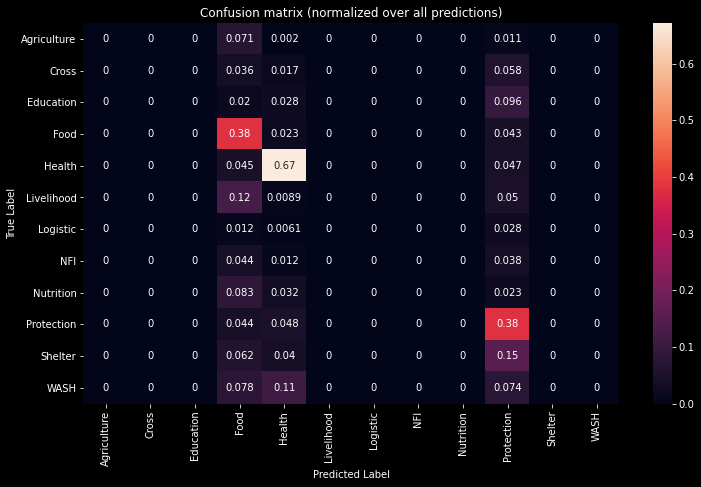

In [81]:
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
        for x, y in test_dataloader:
            x = x.to(params.device)
            y = y.to(params.device)
            
            y_hat = model.forward(x, params.device)
            y_hat_idx = torch.argmax(y_hat, axis=1)
            y_pred.extend(y_hat_idx.cpu().numpy())
            y_true.extend(y.cpu().numpy())

# constant for classes
classes = label_df['label'].values

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(np.nan_to_num(cf_matrix/np.sum(cf_matrix, axis=0),0), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion matrix (normalized over all predictions)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()